# Input-output properties cells

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
# from neuron import h

# MorphoName = 'h01_c3_3896803064_p1_sorted.asc'


# h.load_file("import3d.hoc")
# nl = h.Import3d_Neurolucida3()
# nl.quiet = 1
# nl.input(MorphoName)
# import_neuron = h.Import3d_GUI(nl, 0)
# import_neuron.instantiate()


In [1]:
def instantiate_swc(filename):
    """load an swc file and instantiate it"""
    
    # load the NEURON library (just in case h is defined otherwise elsewhere)
    from neuron import h
    
    # a helper library, included with NEURON
    h.load_file('import3d.hoc')
    
    # load the data. Use Import3d_SWC_read for swc, Import3d_Neurolucida3 for
    # Neurolucida V3, Import3d_MorphML for MorphML (level 1 of NeuroML), or
    # Import3d_Eutectic_read for Eutectic. (There is also an 
    # Import3d_Neurolucida_read for old Neurolucida files, but I've never seen one
    # in practice; try Import3d_Neurolucida3 first.)
    cell = h.Import3d_SWC_read()
    cell.input(filename)

    # easiest to instantiate by passing the loaded morphology to the Import3d_GUI
    # tool; with a second argument of 0, it won't display the GUI, but it will allow
    # use of the GUI's features
    i3d = h.Import3d_GUI(cell, 0)
    i3d.instantiate(None)
    
    return cell

In [4]:
# filename = 'h01_c3_31158667681_50p_p1_sorted.swc'
# cell = instantiate_swc(filename)

In [7]:
def instantiate_asc(filename):
    """load an swc file and instantiate it"""
    
    # load the NEURON library (just in case h is defined otherwise elsewhere)
    from neuron import h
    
    # a helper library, included with NEURON
    h.load_file('import3d.hoc')
    
    # load the data. Use Import3d_SWC_read for swc, Import3d_Neurolucida3 for
    # Neurolucida V3, Import3d_MorphML for MorphML (level 1 of NeuroML), or
    # Import3d_Eutectic_read for Eutectic. (There is also an 
    # Import3d_Neurolucida_read for old Neurolucida files, but I've never seen one
    # in practice; try Import3d_Neurolucida3 first.)
    cell = h.Import3d_Neurolucida3()
    cell.input(filename)

    # easiest to instantiate by passing the loaded morphology to the Import3d_GUI
    # tool; with a second argument of 0, it won't display the GUI, but it will allow
    # use of the GUI's features
    i3d = h.Import3d_GUI(cell, 0)
    i3d.instantiate(None)

    return cell

In [8]:
filename = 'h01_c3_31158667681_50p_p1_sorted2.asc'
cell = instantiate_asc(filename)


4128 lines read

h01_c3_31158667681_50p_p1_sorted2.asc problems


Main branch starting at line 3015 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma

Main branch starting at line 4047 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma

Main branch starting at line 4069 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma


In [29]:
from neuron import h, gui

# gui2.set_backend('jupyter')

h.load_file("import3d.hoc")
h.load_file("stdrun.hoc")

# MorphoName = 'dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC.swc'
# MorphoName = 'h01_c3_3896803064.swc'
# MorphoName = '4607885827.0.swc'

MorphoName = 'h01_c3_636444441_p1_sorted2.asc'


nl = h.Import3d_Neurolucida3()
nl.quiet = 1
nl.input(MorphoName)
import_neuron = h.Import3d_GUI(nl, 0)
import_neuron.instantiate(None)

ps = h.PlotShape()
ps.variable('diam')
ps.show(1)



1.0

PlotShape[0]
	-65 
	-65 


: 

In [19]:
# !pip install plotly -U
# !pip install NeuroM[plotly] -U

In [29]:
import pandas as pd

MorphoName = 'h01_c3_636444441_p1.swc'

df = pd.read_csv('h01_c3_636444441.swc',
                 sep=' ', header=None,
                 names=['index', 'type', 'X', 'Y', 'Z', 'radius', 'parent'])

# df['type'] = df['type'] + 3
df['X'] = df['X'] / 1000
df['Y'] = df['Y'] / 1000
df['Z'] = df['Z'] / 1000
df['radius'] = df['radius'] / 1000
df['index'] = df['index'] - 1996
df['parent'] = df['parent'] - 1996

In [30]:
df3 = df[df['radius'] <= 1.0]
df3['type'] = df3['type'] + 3

/tmp/ipykernel_9983/196770246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['type'] = df3['type'] + 3


In [31]:
df2 = df[df['radius'] > 1.0]
df2['type'] = df2['type'] + 1

/tmp/ipykernel_9983/1015963357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type'] = df2['type'] + 1


In [32]:
df2

,index,type,X,Y,Z,radius,parent
844,-1586,1,3000.800,504.352,16.995,1.084909,-1587
845,-1585,1,3000.576,504.576,16.896,1.282554,-1586
846,-1584,1,3000.352,504.800,16.764,1.465464,-1585
847,-1583,1,3000.320,504.832,16.731,1.491448,-1584
848,-1099,1,2997.024,505.088,16.632,3.291891,-1583
...,...,...,...,...,...,...,...
1718,-36,1,2996.736,511.136,10.956,1.993012,-35
1719,-37,1,2996.864,511.360,10.725,1.737621,-36
1720,-38,1,2996.992,511.552,10.527,1.541747,-37
1721,-39,1,2997.152,511.744,10.329,1.302991,-38


In [33]:
df3

,index,type,X,Y,Z,radius,parent
0,-1995,3,2960.768,423.744,20.361,0.032000,-1997
1,-1994,3,2961.056,423.584,20.394,0.045967,-1995
2,-1993,3,2961.344,423.520,20.559,0.032000,-1994
3,-1992,3,2961.472,423.328,20.757,0.106438,-1993
4,-1991,3,2961.664,423.136,20.922,0.254566,-1992
...,...,...,...,...,...,...,...
1991,-1121,3,2967.648,425.184,21.120,0.072007,-1122
1992,-3,3,3000.416,512.384,17.457,0.045255,-1997
1993,-2,3,3000.672,512.160,17.490,0.045255,-3
1994,-1,3,3000.896,512.000,17.622,0.064000,-2


In [34]:
df2.to_csv(MorphoName[0:-4] + '_soma.swc', sep=' ', index=False)
df3.to_csv(MorphoName[0:-4] + '_dend.swc', sep=' ', index=False)

In [8]:
# for ii in range(1996):
#     if df['radius'][ii] > 1.0:
#         print(df['radius'][ii])
#         df['type'][ii] = 3
#     else:
#         df['type'][ii] = 3

# df

In [9]:
# df.head()

df.to_csv(MorphoName, sep=' ', index=False)

# Sort the DataFrame by 'index' in ascending order
df_sorted = df.sort_values(by='index', ascending=True)

df_sorted.to_csv(MorphoName[0:-4] + '_sorted.swc', sep=' ', index=False)

# Sort the DataFrame by 'radius' in descending order
df_sorted = df.sort_values(by='radius', ascending=False)

df_sorted.to_csv(MorphoName[0:-4] + '_sorted2.swc', sep=' ', index=False)

In [11]:
df_sorted

,index,type,X,Y,Z,radius,parent
860,885,3,2996.928,507.264,16.797,4.110250,886
1695,904,3,2996.384,505.824,15.015,4.021227,903
859,886,3,2996.960,507.040,17.028,4.004486,887
861,884,3,2996.960,507.488,16.566,3.996923,885
858,887,3,2996.928,506.816,17.259,3.934504,888
...,...,...,...,...,...,...,...
1172,1715,3,3051.616,516.192,36.927,0.032000,1714
1173,1716,3,3051.616,516.192,36.993,0.032000,1715
1401,1392,3,2993.184,491.616,52.371,0.032000,1391
1614,1044,3,3018.336,511.200,48.048,0.032000,1043


In [89]:
# ids_array = [int(ii-1) for ii in df_sorted['index'].values if ii not in df_sorted['parent'].values]
# # ids_array
# for ii in ids_array:
#     print(ii+1,df_sorted['radius'][ii])

In [87]:
# import pandas as pd

# df_sorted = pd.read_csv('h01_c3_636444441_p1_sorted.swc',
#                  sep=' ', header=None,
#                  names=['index', 'type', 'X', 'Y', 'Z', 'radius', 'parent'])

In [8]:
import numpy as np

In [9]:
np.int = np.int_

In [23]:
# Import neurom module
import neurom as nm
# Import neurom visualization module
# from neurom import viewer
# from neurom.view import plotly

# MorphoName = 'h01_c3_3896803064_p1_sorted2.swc'
MorphoName = 'h01_c3_636444441_p1_sorted2.swc'
MorphoName = 'h01_c3_636444441_p1_sorted2.asc'

neuronM = nm.load_morphology(MorphoName)

# neuronM = nm.load_neuron(MorphoName)


# Visualize a morphology in two dimensions
# fig, ax = plotly.draw(neuron, plane='xy', inline=True)
# Visualize a morphology in three dimensions
# fig, ax = plotly.draw(neuron, inline=True)
# Visualize a single tree in three dimensions
# fig, ax = plotly.draw(neuron.neurites[0], inline=True)
# Visualize the dendrogram of a morphology
# fig, ax = viewer.draw(neuron, mode='dendrogram')

In [22]:
from neurom import viewer
# from neurom.view import plotly

In [9]:
# Visualize a morphology in two dimensions
# fig, ax = plotly.draw(neuronM, plane='xy', inline=True)
# Visualize a morphology in three dimensions
# fig, ax = plotly.draw(neuronM, inline=True)

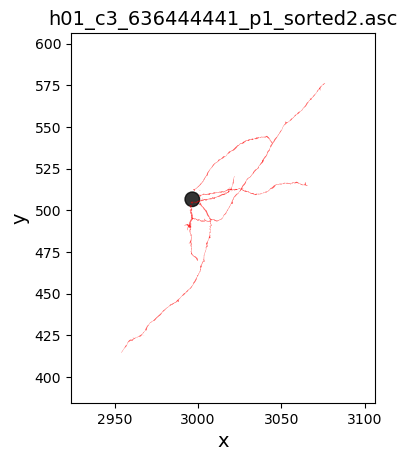

In [24]:
fig, ax = viewer.draw(neuronM)

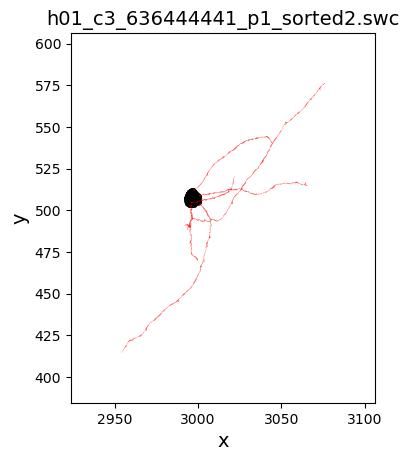

In [19]:
fig, ax = viewer.draw(neuronM)

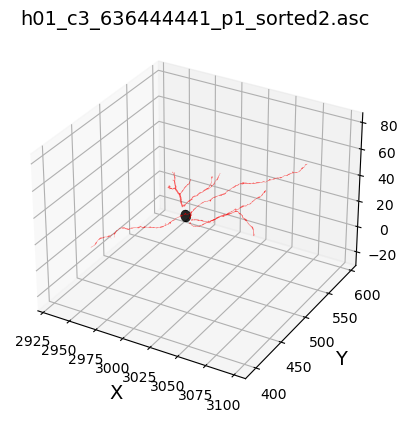

In [25]:
fig, ax = viewer.draw(neuronM, mode='3d')

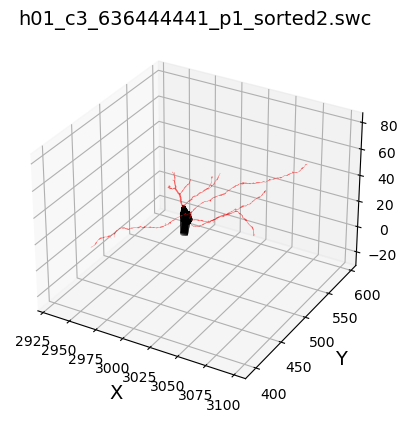

In [20]:
fig, ax = viewer.draw(neuronM, mode='3d')

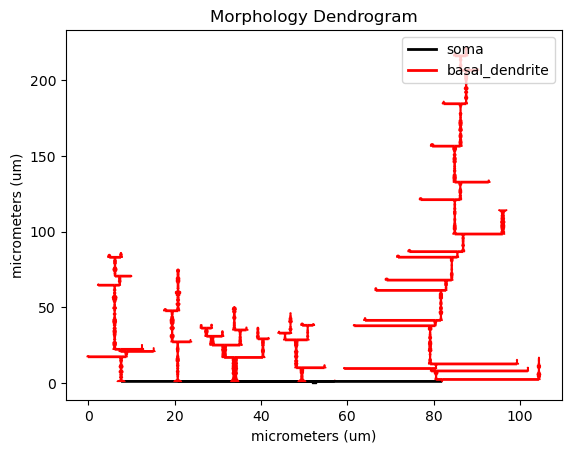

In [15]:
fig, ax = viewer.draw(neuronM, mode='dendrogram')

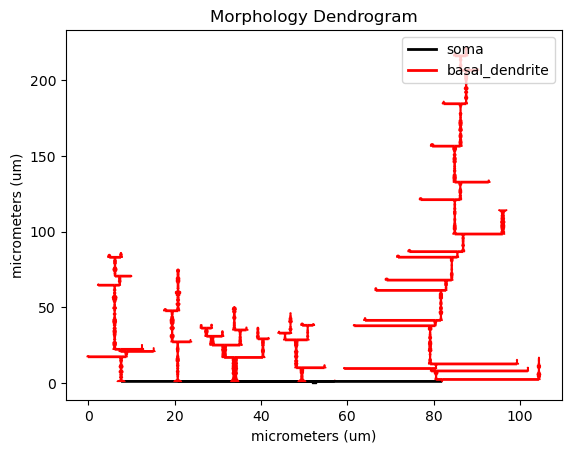

In [13]:
fig, ax = viewer.draw(neuronM, mode='dendrogram')

In [26]:
# Extract the total number of neurites (basal and apical dendrites, and axons)
number_of_neurites = nm.get('number_of_neurites', neuronM)

# Extract the total number of sections
number_of_sections = nm.get('number_of_sections', neuronM)

# Extract the soma radius
soma_radius = neuronM.soma.radius

# Extract the number of sections per neurite
number_of_sections_per_neurite = nm.get('number_of_sections_per_neurite', neuronM)

# Print result
print(neuronM.name, number_of_neurites, soma_radius, number_of_sections)
print()

print("Neurite type \t\t\t| Number of sections")
for i, neurite in enumerate(neuronM.neurites):    
    print("{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i]))

h01_c3_636444441_p1_sorted2.asc 6 4.353735 76

Neurite type 			| Number of sections
NeuriteType.basal_dendrite      | 13
NeuriteType.basal_dendrite      | 5
NeuriteType.basal_dendrite      | 13
NeuriteType.basal_dendrite      | 9
NeuriteType.basal_dendrite      | 1
NeuriteType.basal_dendrite      | 35


In [27]:

MorphoName = 'h01_c3_636444441_p1_sorted2.swc'
# MorphoName = 'h01_c3_636444441_p1_sorted2.asc'

neuronM = nm.load_morphology(MorphoName)



h01_c3_636444441_p1_sorted2.swc:1997:warning
Neurites are not supposed to have parentId: -1
(although this is normal if this neuron has no soma)

h01_c3_636444441_p1_sorted2.swc:1982:warning
Neurites are not supposed to have parentId: -1
(although this is normal if this neuron has no soma)


In [28]:
# Extract the total number of neurites (basal and apical dendrites, and axons)
number_of_neurites = nm.get('number_of_neurites', neuronM)

# Extract the total number of sections
number_of_sections = nm.get('number_of_sections', neuronM)

# Extract the soma radius
soma_radius = neuronM.soma.radius

# Extract the number of sections per neurite
number_of_sections_per_neurite = nm.get('number_of_sections_per_neurite', neuronM)

# Print result
print(neuronM.name, number_of_neurites, soma_radius, number_of_sections)
print()

print("Neurite type \t\t\t| Number of sections")
for i, neurite in enumerate(neuronM.neurites):    
    print("{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i]))

h01_c3_636444441_p1_sorted2.swc 6 24.39691585809343 76

Neurite type 			| Number of sections
NeuriteType.basal_dendrite      | 13
NeuriteType.basal_dendrite      | 5
NeuriteType.basal_dendrite      | 13
NeuriteType.basal_dendrite      | 9
NeuriteType.basal_dendrite      | 1
NeuriteType.basal_dendrite      | 35
